In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('DS3_C6_S3_MallCustomers_Data_Project.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df_1=df.copy()

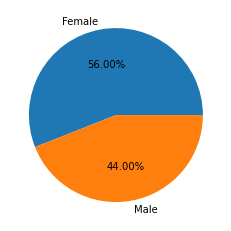

In [8]:
percent=df['Gender'].value_counts()
labels=list(df['Gender'].value_counts().index)
plt.pie(percent,labels=labels,autopct="%0.2f%%");

# About 56% of the customers are females and 44% males


In [9]:
print(f"the no. of null values is gender columns is {df['Gender'].isnull().sum()}")
print(f"the mode of gender column is {df['Gender'].mode()[0]}")

the no. of null values is gender columns is 0
the mode of gender column is Female


In [10]:
def info_of_numerical(col):
    print(f"The mean of the {col} is {df[col].mean()}")
    print(f"The median of the {col} is {df[col].median()}")
    print(f"The mode of the {col} is {df[col].mode()[0]}")
    print(f"The standard deviation of the {col} is {df[col].std()}")
    print(f"Number of missing values in the {col} is {df[col].isnull().sum()}")

In [11]:
def func_plot_numeric(col):
    fig, ax = plt.subplots(1, 2, figsize= (20, 7))              
    sns.histplot(x = df[col], ax =ax[1], color = "m",kde=True) 
    sns.boxplot(x = df[col], ax = ax[0], color = "g") 
    plt.show()


In [12]:
info_of_numerical('Age')

The mean of the Age is 38.85
The median of the Age is 36.0
The mode of the Age is 32
The standard deviation of the Age is 13.969007331558883
Number of missing values in the Age is 0


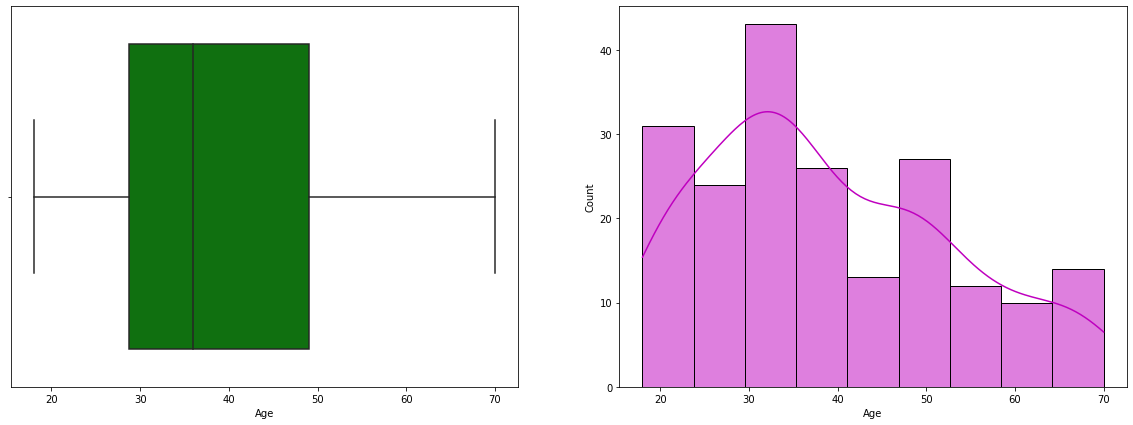

In [13]:
func_plot_numeric('Age')

In [14]:
df['Age'].describe()

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

#  As we  can see that in item outlet sales q3-q2>q2-q1 ideally it follows a right skewed distribution but since mean is approximately equal to median and mode we can say that the graph is symmetrically distributed about the mean so we can say that age of the customers are symmetrically distributed and there are equal no. of customers below and above 38 years of age

info_of_numerical('Annual Income (k$)')

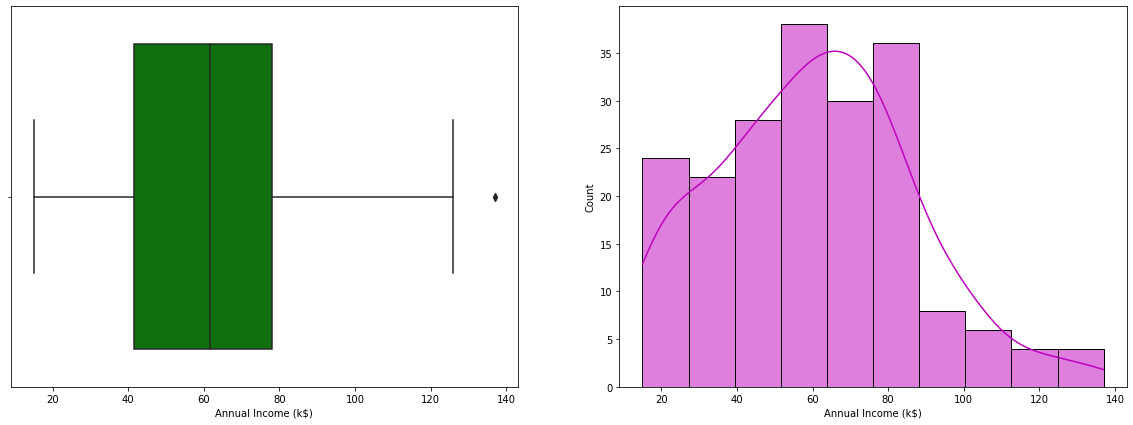

In [16]:
func_plot_numeric('Annual Income (k$)')

In [17]:
df['Annual Income (k$)'].describe()

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual Income (k$), dtype: float64

# Annual income is normally distributed about the mean 61 so the approximately half of the customers have income less then 61000 dollars and half greater then tis amount  that means we have low income medium income high income customers in this data set

In [18]:
info_of_numerical("Spending Score (1-100)")

The mean of the Spending Score (1-100) is 50.2
The median of the Spending Score (1-100) is 50.0
The mode of the Spending Score (1-100) is 42
The standard deviation of the Spending Score (1-100) is 25.823521668370162
Number of missing values in the Spending Score (1-100) is 0


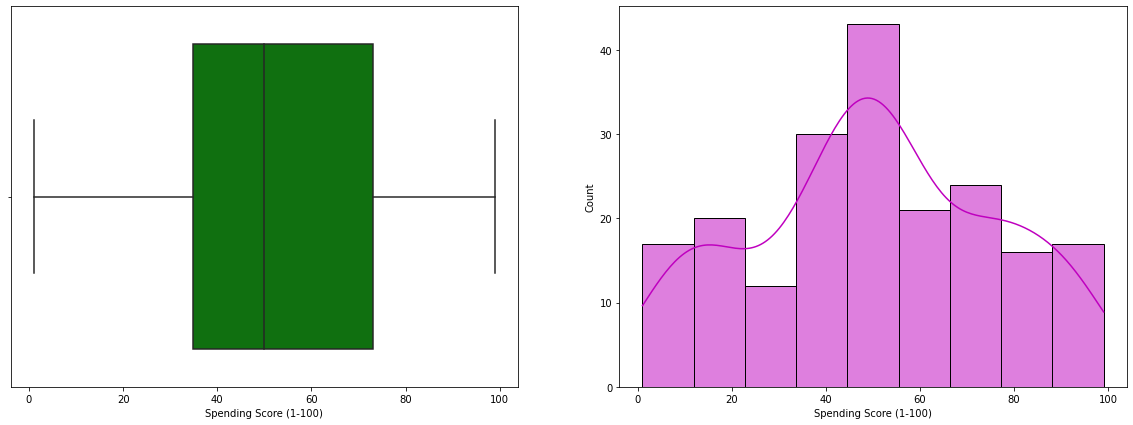

In [19]:
func_plot_numeric("Spending Score (1-100)")

In [20]:
df["Spending Score (1-100)"].value_counts()

42    8
55    7
46    6
73    6
35    5
     ..
31    1
44    1
53    1
65    1
18    1
Name: Spending Score (1-100), Length: 84, dtype: int64

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Gender'>

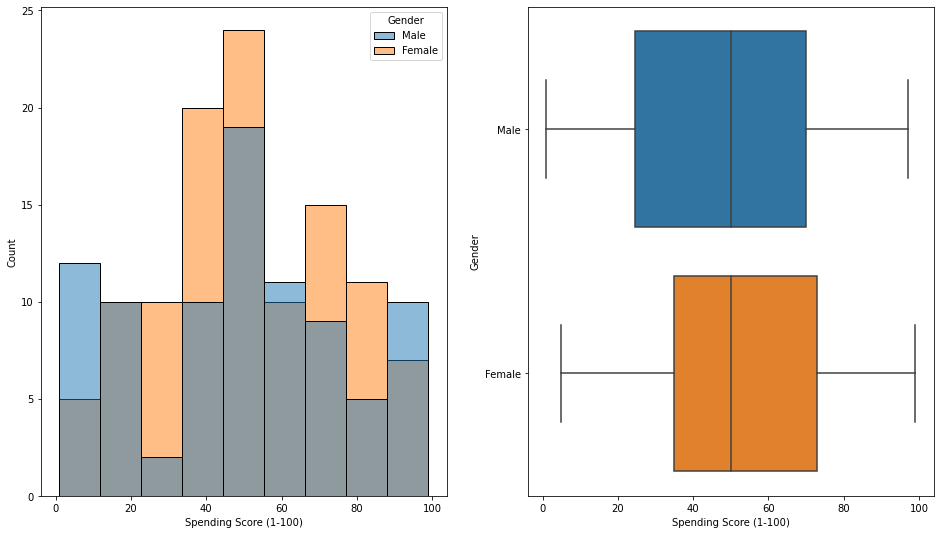

In [21]:
fig,ax=plt.subplots(1,2,figsize=(16,9))
sns.histplot(x=df['Spending Score (1-100)'],hue=df['Gender'],ax=ax[0])
sns.boxplot(x=df['Spending Score (1-100)'],y=df['Gender'])

# Spending scores of females shows better consitency as more number of females lie in more then 50 score 

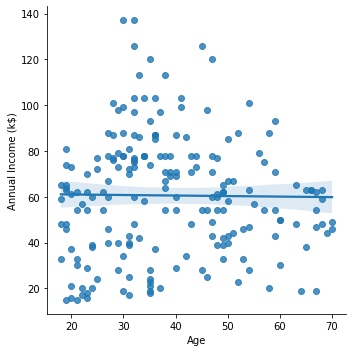

In [166]:
sns.lmplot(data=df_1,x='Age',y='Annual Income (k$)')

In [23]:
df['Age'].corr(df['Annual Income (k$)'])

-0.012398042736060145

# As we can see that the correaltion value is negative it implies that as the age increases annual income decreases

<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

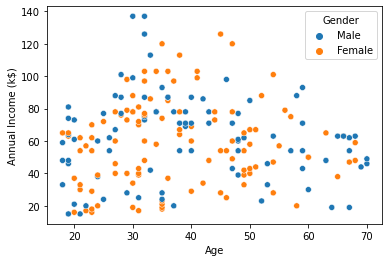

In [24]:
sns.scatterplot(x=df['Age'],y=df['Annual Income (k$)'],hue=df['Gender'])

In [25]:
df[df['Gender']=='Male'].corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.095603,0.969826,-0.045814
Age,-0.095603,1.000000,-0.092978,-0.279628
Annual Income (k$),0.969826,-0.092978,1.000000,-0.023684
Spending Score (1-100),-0.045814,-0.279628,-0.023684,1.000000


In [26]:
df[df['Gender']=='Female'].corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,0.031175,0.983836,0.073714
Age,0.031175,1.000000,0.059912,-0.375439
Annual Income (k$),0.983836,0.059912,1.000000,0.047542
Spending Score (1-100),0.073714,-0.375439,0.047542,1.000000


# As we can see that correlation value for male is negative therefore as age increases for male income decreases

# As we can see that correlation value for female is positive therefore as age increases for income for female increases

In [28]:
df[df['Gender']=='Male']

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
8,9,Male,64,19,3
10,11,Male,67,19,14
14,15,Male,37,20,13
...,...,...,...,...,...
187,188,Male,28,101,68
192,193,Male,33,113,8
197,198,Male,32,126,74
198,199,Male,32,137,18


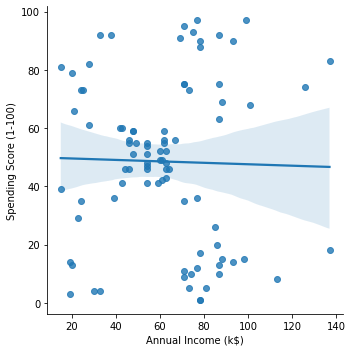

In [156]:
sns.lmplot(data=df_1[df_1['Gender']=='Male'],x='Annual Income (k$)',y='Spending Score (1-100)')


# Linear regression plot which indicates that as annual income increases spending scores decreases for male so there are some factors due to which they have been given less spending scores

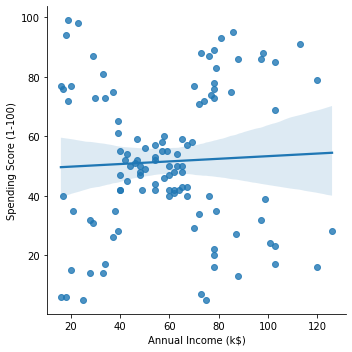

In [167]:
sns.lmplot(data=df_1[df_1['Gender']=='Female'],x='Annual Income (k$)',y='Spending Score (1-100)')

# For female as annual income increaes spending score increases so there are some factors which contribute to this increment

# Both for male and females as age  increaes spending score decreases that means with age interest level in shopping decreases

In [31]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [33]:
df['Gender']=df['Gender'].astype("category")

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   CustomerID              200 non-null    int64   
 1   Gender                  200 non-null    category
 2   Age                     200 non-null    int64   
 3   Annual Income (k$)      200 non-null    int64   
 4   Spending Score (1-100)  200 non-null    int64   
dtypes: category(1), int64(4)
memory usage: 6.7 KB


# Converting category into integer using label encoder

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
label=LabelEncoder()

In [37]:
df['Gender']=label.fit_transform(df['Gender'])

# Scaling the data using standard scaler

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler=StandardScaler()

In [40]:
df_scaled = scaler.fit_transform(df.drop('CustomerID',axis=1))

In [41]:
df_scaled

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

In [42]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [43]:
df_scaled_dataframe=pd.DataFrame(df_scaled,columns=['Gender', 'Age', 'Annual Income (k$)','Spending Score (1-100)'])
df_scaled_dataframe

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,-0.886405,-0.276302,2.268791,1.118061
196,-0.886405,0.441365,2.497807,-0.861839
197,1.128152,-0.491602,2.497807,0.923953
198,1.128152,-0.491602,2.917671,-1.250054


In [44]:
df_scaled_dataframe.index=df['CustomerID'].values

In [45]:
df_scaled_dataframe.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
1,1.128152,-1.424569,-1.738999,-0.434801
2,1.128152,-1.281035,-1.738999,1.195704
3,-0.886405,-1.352802,-1.700830,-1.715913
4,-0.886405,-1.137502,-1.700830,1.040418
5,-0.886405,-0.563369,-1.662660,-0.395980


In [46]:
from sklearn.decomposition import PCA

# For dimension reduction

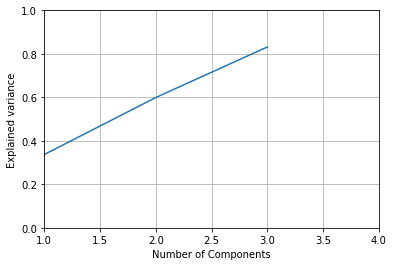

In [54]:
p = []

for n in range(1,4):
    pca = PCA(n_components=n)
    pca.fit(df_scaled_dataframe)
    
    p.append(sum(pca.explained_variance_ratio_))
    
plt.plot(range(1,4),p)
plt.grid()
plt.xlim(1,4)
plt.ylim(0,1)
plt.xlabel("Number of Components")
plt.ylabel("Explained variance");

# Here as we can see that three features are able to explain about 85 % of variance in the data we choose the same

# Number of components

In [55]:
pca=PCA(n_components=3)
df_reduced=pca.fit_transform(df_scaled_dataframe)
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.33690046, 0.26230645, 0.23260639])

In [56]:
df_reduced

array([[-4.06382715e-01, -5.20713635e-01, -2.07252663e+00],
       [-1.42767287e+00, -3.67310199e-01, -2.27764369e+00],
       [ 5.07605706e-02, -1.89406774e+00, -3.67375232e-01],
       [-1.69451310e+00, -1.63190805e+00, -7.17466691e-01],
       [-3.13108383e-01, -1.81048272e+00, -4.26459924e-01],
       [-1.71744627e+00, -1.59926418e+00, -6.96379423e-01],
       [ 7.90821124e-01, -1.94727112e+00, -1.86491593e-01],
       [-2.14832159e+00, -1.50537369e+00, -7.58463596e-01],
       [ 2.77428623e+00, -8.82987672e-01, -1.38814112e+00],
       [-1.21629477e+00, -1.61640464e+00, -5.55769702e-01],
       [ 2.62905084e+00, -8.61237043e-01, -1.42011358e+00],
       [-1.68947038e+00, -1.54542784e+00, -6.55007647e-01],
       [ 1.68582253e+00, -2.02394479e+00,  1.69391673e-02],
       [-1.64607339e+00, -1.52251259e+00, -6.10409943e-01],
       [ 1.17443628e+00, -6.12790961e-01, -1.65373684e+00],
       [-1.32613070e+00, -2.36719149e-01, -2.13541457e+00],
       [ 1.67728253e-02, -1.74344572e+00

In [57]:
df_red_data=pd.DataFrame(df_reduced)
df_red_data

,0,1,2
0,-0.406383,-0.520714,-2.072527
1,-1.427673,-0.367310,-2.277644
2,0.050761,-1.894068,-0.367375
3,-1.694513,-1.631908,-0.717467
4,-0.313108,-1.810483,-0.426460
...,...,...,...
195,-1.179572,1.324568,1.932441
196,0.672751,1.221061,2.438084
197,-0.723719,2.765010,0.583178
198,0.767096,2.861930,1.150341


# without reduced performing the kmeans 

In [58]:
from sklearn.cluster import KMeans

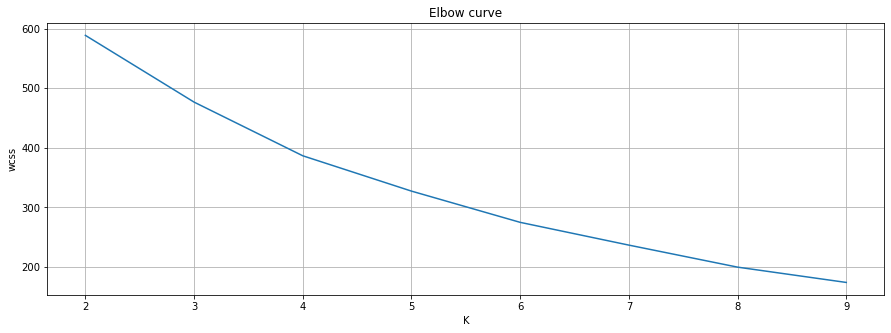

In [59]:
wcss = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 10), wcss)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('wcss')
plt.title('Elbow curve');

In [60]:
pd.Series(wcss).diff()

0           NaN
1   -112.015122
2    -90.072769
3    -59.301591
4    -52.421408
5    -38.199461
6    -36.960066
7    -25.681029
dtype: float64

# Here our criterian is basically the drop in within cluster sum of squared that we obtain with increasing values of n_clusters as we see taht after 5 there is no significant drop we choose n_clusters=5

In [63]:
k_without_reduced_1=KMeans(n_clusters=5)
y_pred_reduced=k_without_reduced_1.fit_predict(df_scaled)

In [61]:
df_scaled

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

In [62]:
df_scaled_dataframe

,Gender,Age,Annual Income (k$),Spending Score (1-100)
1,1.128152,-1.424569,-1.738999,-0.434801
2,1.128152,-1.281035,-1.738999,1.195704
3,-0.886405,-1.352802,-1.700830,-1.715913
4,-0.886405,-1.137502,-1.700830,1.040418
5,-0.886405,-0.563369,-1.662660,-0.395980
...,...,...,...,...
196,-0.886405,-0.276302,2.268791,1.118061
197,-0.886405,0.441365,2.497807,-0.861839
198,1.128152,-0.491602,2.497807,0.923953
199,1.128152,-0.491602,2.917671,-1.250054


In [65]:
import numpy as np
np.unique(y_pred_reduced)

array([0, 1, 2, 3, 4])

In [66]:
y_pred_reduced.shape

(200,)

In [67]:
from sklearn.metrics import silhouette_score

In [68]:
silhouette_score(df_scaled,y_pred_reduced)

0.31606517761091896

# Silhouette score in this case is 0.316

In [69]:
df_scaled_dataframe_1=df_scaled_dataframe.copy()

In [70]:
df_scaled_dataframe_1['cluster_label']=y_pred_reduced

In [71]:
df_scaled_dataframe_1

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_label
1,1.128152,-1.424569,-1.738999,-0.434801,1
2,1.128152,-1.281035,-1.738999,1.195704,1
3,-0.886405,-1.352802,-1.700830,-1.715913,0
4,-0.886405,-1.137502,-1.700830,1.040418,3
5,-0.886405,-0.563369,-1.662660,-0.395980,0
...,...,...,...,...,...
196,-0.886405,-0.276302,2.268791,1.118061,3
197,-0.886405,0.441365,2.497807,-0.861839,4
198,1.128152,-0.491602,2.497807,0.923953,1
199,1.128152,-0.491602,2.917671,-1.250054,4


# Plotting scatter plot between two features annual income and spending scores

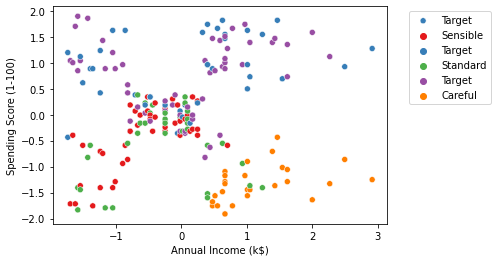

In [180]:
sns.scatterplot(data=df_scaled_dataframe_1,x='Annual Income (k$)',y='Spending Score (1-100)',hue='cluster_label',palette='Set1')
plt.legend(bbox_to_anchor=[1.05,1],labels=['Target','Sensible','Target','Standard','Target','Careful'])

# with reduced performing k means

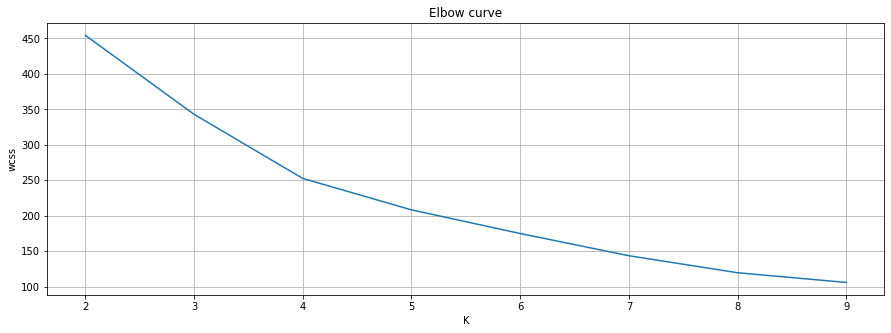

In [74]:
wcss_1 = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_reduced)
    wcss_1.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 10), wcss_1)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('wcss')
plt.title('Elbow curve');

In [75]:
pd.Series(wcss_1).diff()

0           NaN
1   -111.315806
2    -90.350037
3    -44.326901
4    -33.282468
5    -31.342150
6    -23.961971
7    -13.693873
dtype: float64

# Using the same chossing n_clusters=4

In [181]:
k_with_reduced_1=KMeans(n_clusters=4)
y_pred_reduced=k_with_reduced_1.fit_predict(df_reduced)

In [182]:
y_pred_reduced

array([2, 2, 0, 1, 0, 1, 0, 1, 3, 1, 3, 1, 0, 1, 3, 2, 0, 2, 3, 1, 3, 2,
       0, 2, 0, 2, 0, 2, 0, 1, 3, 1, 3, 2, 0, 1, 0, 1, 0, 1, 0, 2, 3, 1,
       0, 1, 0, 1, 1, 1, 0, 2, 1, 3, 0, 3, 0, 3, 1, 3, 3, 2, 0, 0, 3, 2,
       0, 0, 2, 1, 3, 0, 0, 0, 3, 2, 0, 3, 1, 0, 3, 2, 3, 0, 1, 3, 0, 1,
       1, 0, 0, 2, 3, 0, 1, 2, 0, 1, 3, 2, 1, 0, 3, 2, 3, 1, 0, 3, 3, 3,
       3, 1, 0, 2, 1, 1, 0, 0, 0, 0, 2, 0, 1, 2, 1, 1, 3, 2, 3, 2, 3, 2,
       1, 1, 3, 1, 0, 2, 3, 1, 0, 2, 1, 1, 3, 2, 3, 1, 0, 2, 3, 2, 0, 1,
       0, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 0, 2, 3, 2, 3, 2, 0, 1,
       3, 2, 3, 2, 0, 1, 3, 1, 0, 2, 0, 2, 0, 1, 0, 1, 3, 1, 0, 1, 0, 2,
       3, 2])

In [183]:
silhouette_score(df_reduced,y_pred_reduced)

0.39453092943542983

# Silhouette score is 0.394

In [79]:
df_red_data

,0,1,2
0,-0.406383,-0.520714,-2.072527
1,-1.427673,-0.367310,-2.277644
2,0.050761,-1.894068,-0.367375
3,-1.694513,-1.631908,-0.717467
4,-0.313108,-1.810483,-0.426460
...,...,...,...
195,-1.179572,1.324568,1.932441
196,0.672751,1.221061,2.438084
197,-0.723719,2.765010,0.583178
198,0.767096,2.861930,1.150341


<AxesSubplot:xlabel='1', ylabel='2'>

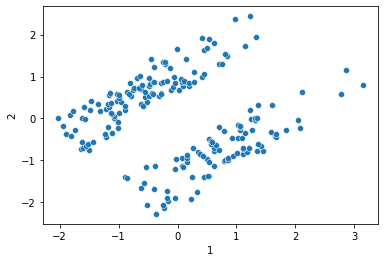

In [80]:
sns.scatterplot(data=df_red_data,x=1,y=2,hue='')

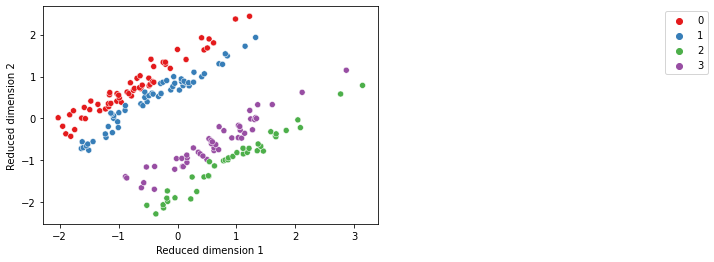

In [187]:
sns.scatterplot(x=df_red_data[1],y=df_red_data[2],hue=y_pred_reduced,palette='Set1')
plt.xlabel('Reduced dimension 1')
plt.ylabel('Reduced dimension 2')
plt.legend(bbox_to_anchor=[2,1])

# As we can clearly se we can group the customers in the clusters very well

# agglomerative clustering

In [84]:
df_scaled_dataframe

,Gender,Age,Annual Income (k$),Spending Score (1-100)
1,1.128152,-1.424569,-1.738999,-0.434801
2,1.128152,-1.281035,-1.738999,1.195704
3,-0.886405,-1.352802,-1.700830,-1.715913
4,-0.886405,-1.137502,-1.700830,1.040418
5,-0.886405,-0.563369,-1.662660,-0.395980
...,...,...,...,...
196,-0.886405,-0.276302,2.268791,1.118061
197,-0.886405,0.441365,2.497807,-0.861839
198,1.128152,-0.491602,2.497807,0.923953
199,1.128152,-0.491602,2.917671,-1.250054


#  without reduced

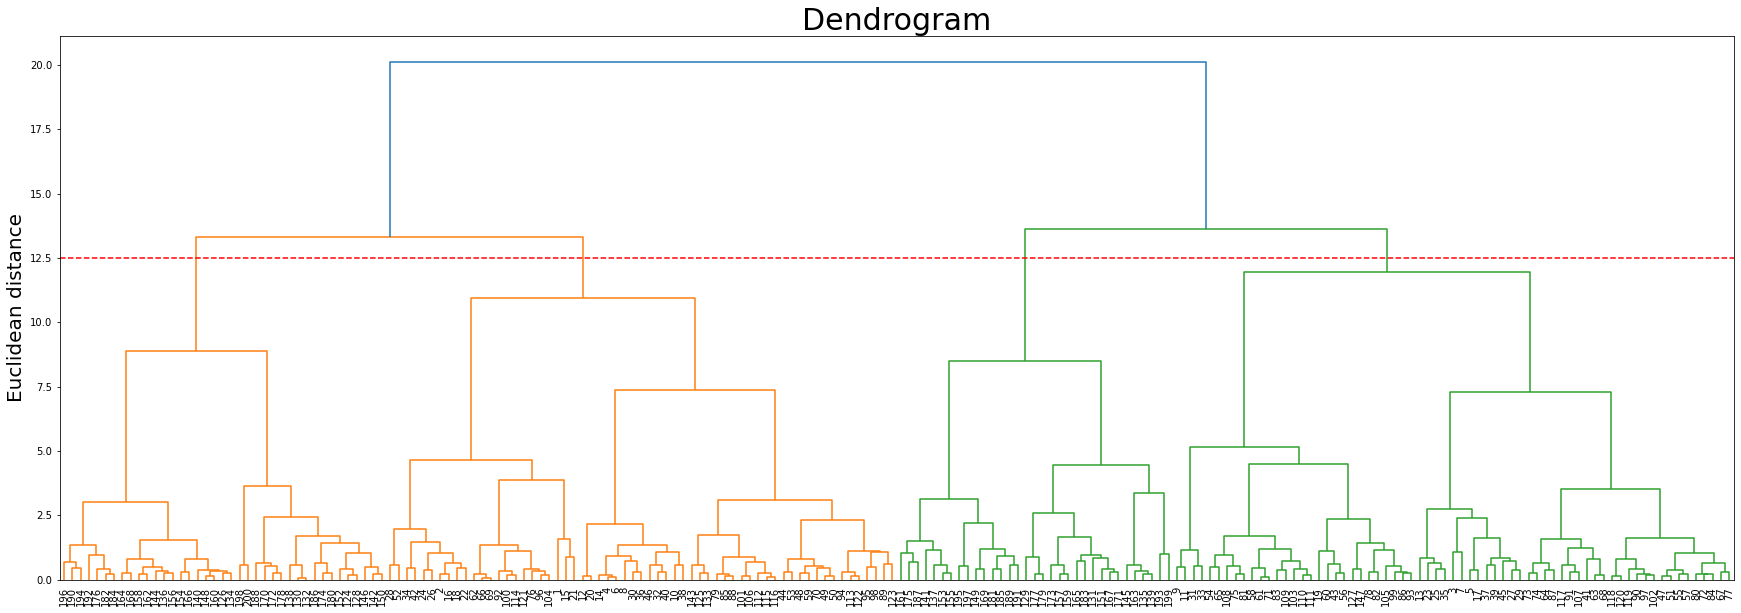

In [91]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(df_scaled, method = 'ward'),labels=df_scaled_dataframe.index)
plt.axhline(y=12.5, color='r', linestyle='--')
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Dendrogram',fontsize=30)

plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

# Taking the number of clusters as 4

In [88]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(df_scaled)

In [89]:
y_hc

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 3, 1, 3, 0, 3, 2, 3, 2, 3,
       1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3], dtype=int64)

In [90]:
silhouette_score(df_scaled,y_hc)

0.2632260518820244

In [92]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

# In the below scatter pot we can cluster the customers

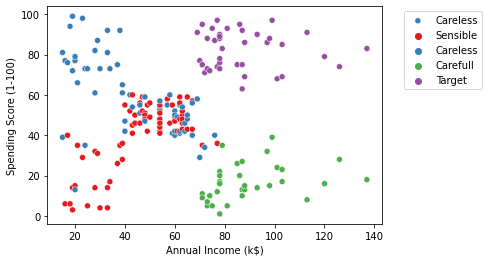

In [194]:
sns.scatterplot(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'],hue=y_hc,palette='Set1')
plt.legend(bbox_to_anchor=[1.05,1],labels=['Careless','Sensible','Careless','Carefull','Target'])

# Customers with less income and less spending scores as sensible,less income and high spending scores as careless,high income low spending scores carefull, high income high spending scores as Target

In [97]:
df_reduced

array([[-4.06382715e-01, -5.20713635e-01, -2.07252663e+00],
       [-1.42767287e+00, -3.67310199e-01, -2.27764369e+00],
       [ 5.07605706e-02, -1.89406774e+00, -3.67375232e-01],
       [-1.69451310e+00, -1.63190805e+00, -7.17466691e-01],
       [-3.13108383e-01, -1.81048272e+00, -4.26459924e-01],
       [-1.71744627e+00, -1.59926418e+00, -6.96379423e-01],
       [ 7.90821124e-01, -1.94727112e+00, -1.86491593e-01],
       [-2.14832159e+00, -1.50537369e+00, -7.58463596e-01],
       [ 2.77428623e+00, -8.82987672e-01, -1.38814112e+00],
       [-1.21629477e+00, -1.61640464e+00, -5.55769702e-01],
       [ 2.62905084e+00, -8.61237043e-01, -1.42011358e+00],
       [-1.68947038e+00, -1.54542784e+00, -6.55007647e-01],
       [ 1.68582253e+00, -2.02394479e+00,  1.69391673e-02],
       [-1.64607339e+00, -1.52251259e+00, -6.10409943e-01],
       [ 1.17443628e+00, -6.12790961e-01, -1.65373684e+00],
       [-1.32613070e+00, -2.36719149e-01, -2.13541457e+00],
       [ 1.67728253e-02, -1.74344572e+00

In [101]:
df_red_data.index=df['CustomerID'].values

In [102]:
df_red_data

,0,1,2
1,-0.406383,-0.520714,-2.072527
2,-1.427673,-0.367310,-2.277644
3,0.050761,-1.894068,-0.367375
4,-1.694513,-1.631908,-0.717467
5,-0.313108,-1.810483,-0.426460
...,...,...,...
196,-1.179572,1.324568,1.932441
197,0.672751,1.221061,2.438084
198,-0.723719,2.765010,0.583178
199,0.767096,2.861930,1.150341


# with reduced

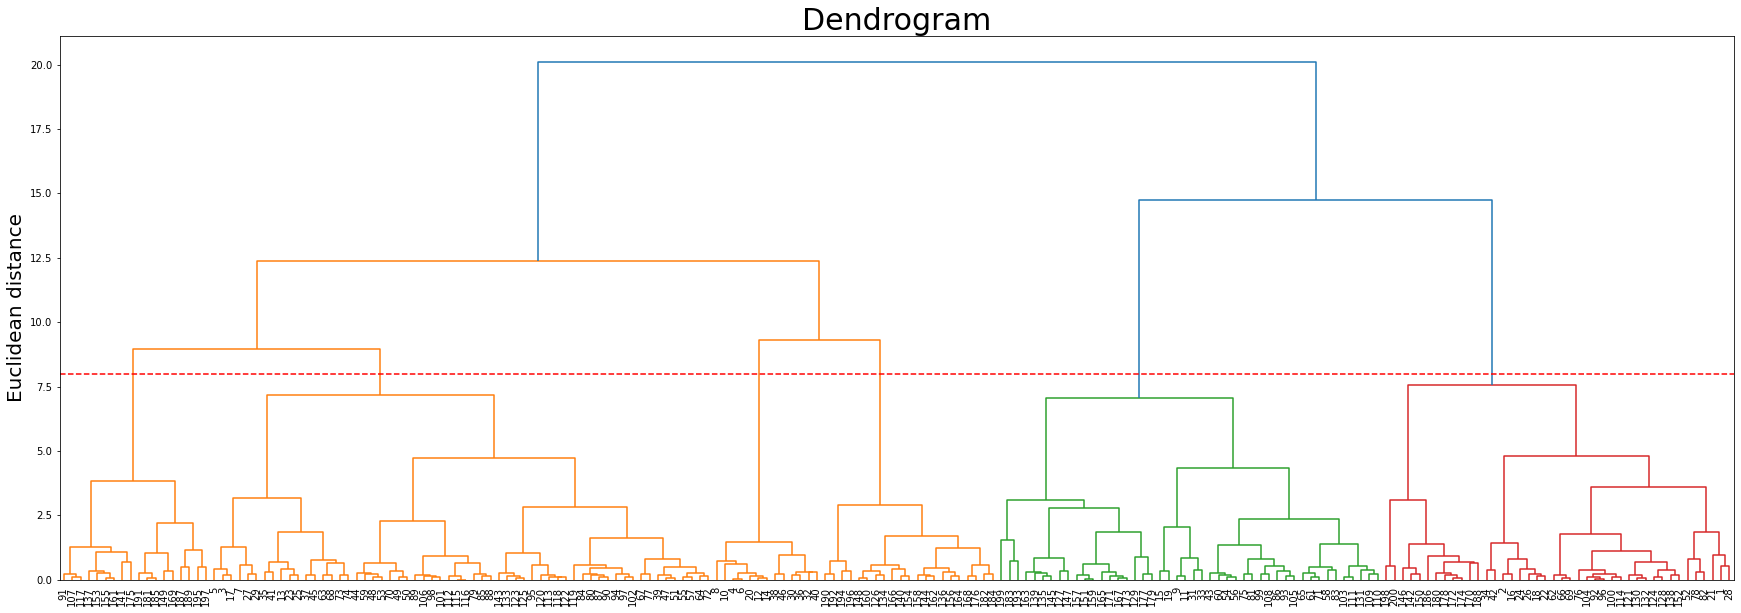

In [106]:
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(df_reduced, method = 'ward'),labels=df_red_data.index)
plt.axhline(y=8, color='r', linestyle='--')
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Dendrogram',fontsize=30)

plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

In [107]:
hc = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage = 'ward')
y_hc_1 = hc.fit_predict(df_reduced)

In [108]:
silhouette_score(df_reduced,y_hc_1)

0.3673619621029458

# Silhouettte score is 0.36

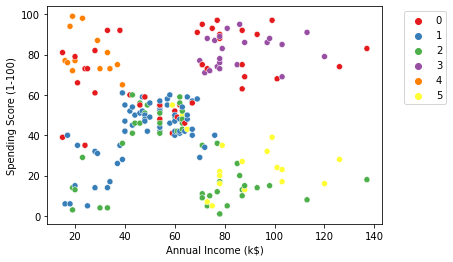

In [133]:
sns.scatterplot(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'],hue=y_hc_1,palette='Set1')
plt.legend(bbox_to_anchor=[1.05,1])

# Here the clustering is not like that we can group the customers on the basis of income and spending scores

# DBSCAN

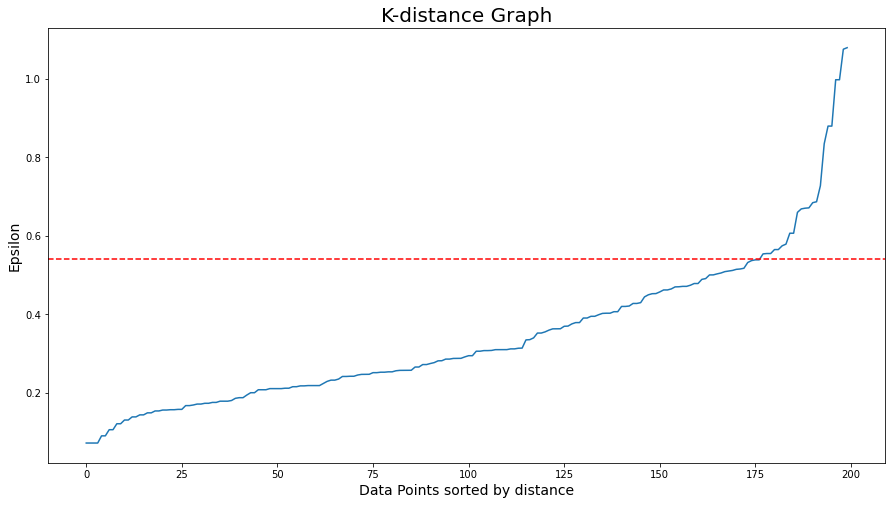

In [113]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df_scaled)
distances, indices = nbrs.kneighbors(df_scaled)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(15,8))
plt.plot(distances)
plt.axhline(y=0.54, color='r', linestyle='--')
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [116]:
from sklearn.cluster import DBSCAN
eps=0.54
for min_samples in range(2,12):
    clusterer = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels = clusterer.fit_predict(df_scaled)

    X= cluster_labels +2
    y = np.bincount(X)
    ii = np.nonzero(y)[0]
    results = list(zip(ii,y[ii]) )
    print('eps=',eps,'| min_samples= ', min_samples, '| obtained clustering: ', results,'|silhoutte score',silhouette_score(df_scaled,cluster_labels))

eps= 0.54 | min_samples=  2 | obtained clustering:  [(1, 23), (2, 6), (3, 58), (4, 6), (5, 4), (6, 2), (7, 5), (8, 2), (9, 20), (10, 3), (11, 7), (12, 2), (13, 9), (14, 19), (15, 3), (16, 3), (17, 7), (18, 4), (19, 4), (20, 5), (21, 4), (22, 2), (23, 2)] |silhoutte score 0.16561092227752103
eps= 0.54 | min_samples=  3 | obtained clustering:  [(1, 33), (2, 58), (3, 4), (4, 6), (5, 6), (6, 5), (7, 20), (8, 3), (9, 7), (10, 9), (11, 19), (12, 3), (13, 4), (14, 4), (15, 3), (16, 7), (17, 5), (18, 4)] |silhoutte score 0.14139541867982675
eps= 0.54 | min_samples=  4 | obtained clustering:  [(1, 53), (2, 57), (3, 6), (4, 4), (5, 4), (6, 20), (7, 7), (8, 8), (9, 18), (10, 4), (11, 7), (12, 4), (13, 4), (14, 4)] |silhoutte score 0.10066783081554201
eps= 0.54 | min_samples=  5 | obtained clustering:  [(1, 93), (2, 9), (3, 5), (4, 23), (5, 20), (6, 19), (7, 7), (8, 17), (9, 7)] |silhoutte score 0.10616110554688352
eps= 0.54 | min_samples=  6 | obtained clustering:  [(1, 111), (2, 9), (3, 18), (4,

In [ ]:
df_scaled

In [117]:
db_1=DBSCAN(eps=0.54,min_samples=2)
y_pred_without_reduced_dscan=db_1.fit_predict(df_scaled)
y_pred_without_reduced_dscan

array([-1,  0, -1,  1,  2,  1, -1,  1,  3,  1,  3,  4,  5,  1, -1,  0,  2,
        0, -1,  4, -1,  0,  5,  0,  5,  0,  2, -1,  2,  1,  3,  1,  3,  6,
        5,  1,  5,  1,  2,  1, -1,  6,  7,  1,  2,  1,  1,  1,  1,  1,  1,
       -1,  1,  7,  1,  7,  1,  7,  1,  7,  7,  8,  1,  1,  7,  8,  1,  1,
        8,  1,  7,  1,  1,  1,  7,  9,  1, 10,  1,  1,  7, 10,  7,  1,  1,
        7,  1,  1, -1,  1,  1,  9,  7,  1,  1,  9,  1,  1,  7,  9,  1,  1,
        7,  9,  7,  1,  1,  7,  7,  7,  7,  1,  1,  9,  1,  1,  1,  1,  1,
        1,  9,  1, -1, 11,  1, 12, 13, 11, -1, 14, 15, 14,  1, 12, 16, 12,
       17, 14, 16, 12, -1, 11,  1, 12, 16, 11, 13, 12, 18, 11, 15, 11, 17,
       12, 17, 12, 15, 12, 15, 12, -1, 12, 16, 12, 13, 12, 15, 12, 18, 19,
       15, 19, 15, 11, 17, 12, 20, 19, 20, 11, 18, 12, -1, 12, 18, 11, -1,
       19, -1, 12, 18, -1, -1, 12, 21, -1, 21, -1, -1, -1], dtype=int64)

In [120]:
y_pred_without_reduced_dscan.shape

(200,)

In [118]:
silhouette_score(df_scaled,y_pred_without_reduced_dscan)

0.16561092227752103

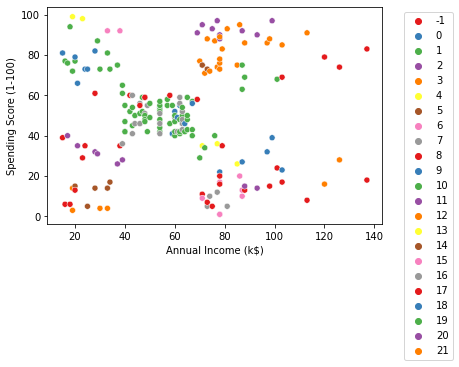

In [131]:
sns.scatterplot(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'],hue=y_pred_without_reduced_dscan,palette='Set1')
plt.legend(bbox_to_anchor=[1.05,1])

# with dimension reduction

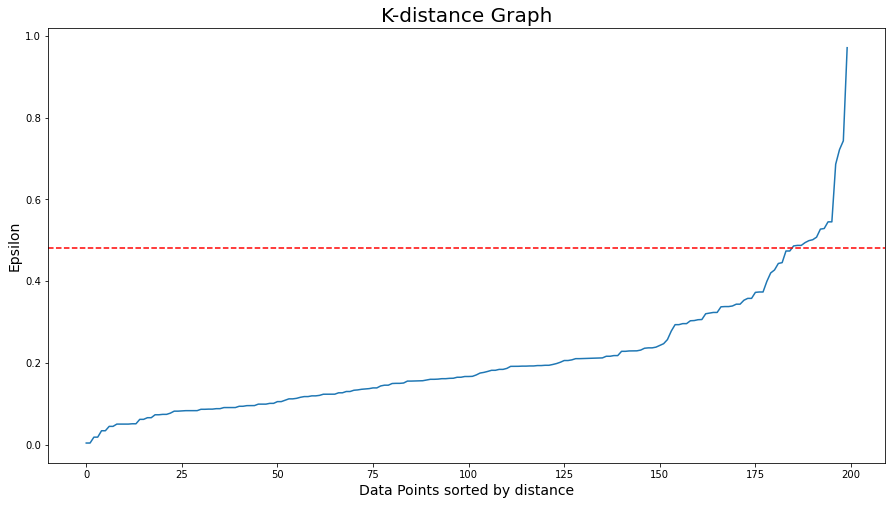

In [124]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df_reduced)
distances, indices = nbrs.kneighbors(df_reduced)


distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(15,8))
plt.plot(distances)
plt.axhline(y=0.48, color='r', linestyle='--')
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [125]:
eps=0.48
for min_samples in range(2,12):
    clusterer = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels = clusterer.fit_predict(df_reduced)

    X= cluster_labels +2
    y = np.bincount(X)
    ii = np.nonzero(y)[0]
    results = list(zip(ii,y[ii]) )
    print('eps=',eps,'| min_samples= ', min_samples, '| obtained clustering: ', results,'|silhoutte score',silhouette_score(df_scaled,cluster_labels))

eps= 0.48 | min_samples=  2 | obtained clustering:  [(1, 15), (2, 6), (3, 95), (4, 11), (5, 4), (6, 2), (7, 2), (8, 36), (9, 3), (10, 22), (11, 2), (12, 2)] |silhoutte score 0.07406980631887673
eps= 0.48 | min_samples=  3 | obtained clustering:  [(1, 23), (2, 6), (3, 95), (4, 11), (5, 4), (6, 36), (7, 3), (8, 22)] |silhoutte score 0.15151280655798016
eps= 0.48 | min_samples=  4 | obtained clustering:  [(1, 27), (2, 11), (3, 6), (4, 90), (5, 4), (6, 36), (7, 22), (8, 4)] |silhoutte score 0.10630473105976103
eps= 0.48 | min_samples=  5 | obtained clustering:  [(1, 37), (2, 11), (3, 6), (4, 84), (5, 36), (6, 22), (7, 4)] |silhoutte score 0.08352128259156782
eps= 0.48 | min_samples=  6 | obtained clustering:  [(1, 46), (2, 11), (3, 6), (4, 78), (5, 35), (6, 20), (7, 4)] |silhoutte score 0.07118205865555984
eps= 0.48 | min_samples=  7 | obtained clustering:  [(1, 63), (2, 11), (3, 73), (4, 33), (5, 20)] |silhoutte score 0.13678018625591748
eps= 0.48 | min_samples=  8 | obtained clustering: 

In [126]:
db_2=DBSCAN(eps=0.48,min_samples=3)
y_pred_with_reduced_dscan=db_2.fit_predict(df_scaled)
y_pred_with_reduced_dscan

array([-1,  1, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1,  2,  0, -1,  1, -1,
        1, -1, -1, -1,  1, -1,  1,  2,  1,  3, -1,  3,  0, -1,  0, -1, -1,
        2,  0, -1, -1,  3,  0, -1, -1,  6,  5, -1, -1,  4,  5,  5,  5,  4,
       -1,  5, -1,  4,  6,  4,  7,  5,  6,  7,  8,  9,  4,  6,  8,  4,  9,
        8,  5,  7,  4,  4,  4,  6, 10,  4, -1,  5,  4,  6, -1,  7,  4,  5,
        6,  4,  5, -1,  4,  9, 10,  6,  5,  5, 10,  4,  5,  6, 10,  5,  4,
        7, 10,  6,  5,  9,  6,  7,  7,  7,  5,  5, 10,  5,  5,  9,  4,  4,
        4, 10,  5, -1, 11, 14, 12, -1, 11, -1, 13, -1, 13, 14, 12, 15, 12,
       17, 13, 15, 12, -1, 11, 14, 12, 15, 11, -1, 12, 18, 11, 16, 11, 17,
       12, 17, 12, -1, 12, -1, 12, -1, 12, 15, 12, -1, 12, 16, 12, 18, 19,
       16, 19, 16, 11, -1, 12, -1, 19, -1, 11, 18, 12, -1, 12, 18, -1, -1,
       -1, -1, 12, 18, -1, -1, 12, -1, -1, -1, -1, -1, -1], dtype=int64)

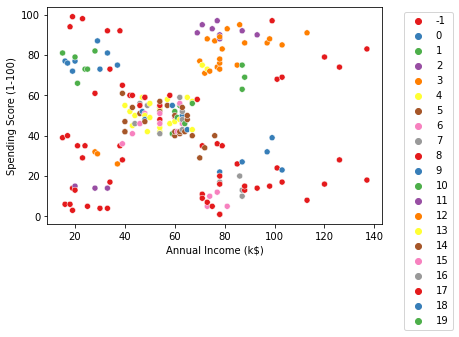

In [129]:
sns.scatterplot(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'],hue=y_pred_with_reduced_dscan,palette='Set1')
plt.legend(bbox_to_anchor=[1.05,1])

In [136]:
X=df.iloc[:,[3,4]].values

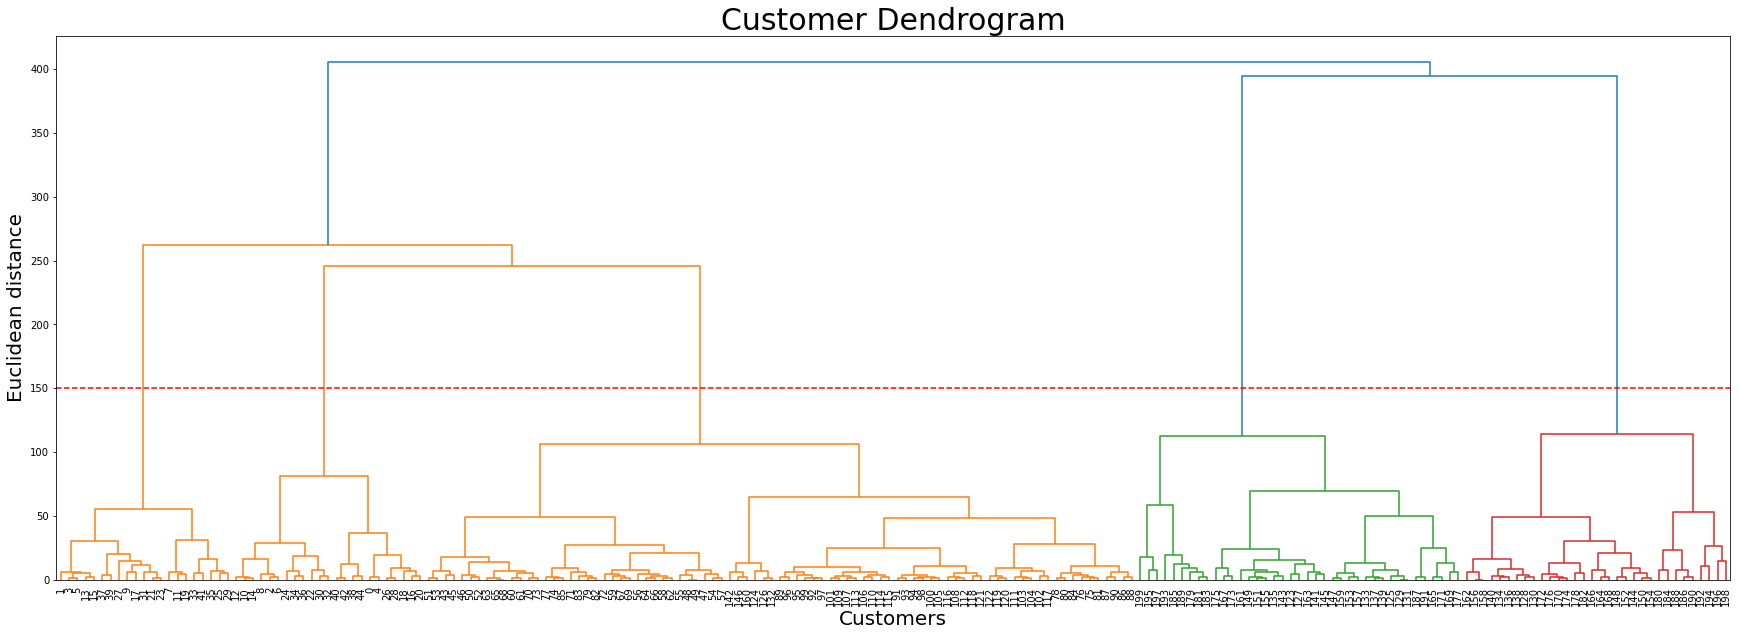

In [138]:
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(X, method = 'ward'),labels=df.index)
plt.axhline(y=150, color='r', linestyle='--')
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Customer Dendrogram',fontsize=30)
plt.xlabel('Customers',fontsize=20)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

In [139]:
hc_a = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc_a = hc.fit_predict(X)

In [140]:
y_hc_a

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 5, 0, 5, 0,
       1, 0, 5, 0, 5, 0, 5, 0, 5, 0, 1, 0, 5, 0, 1, 0, 5, 0, 5, 0, 5, 0,
       5, 0, 5, 0, 5, 0, 1, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0,
       5, 0, 5, 0, 2, 0, 5, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int64)

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


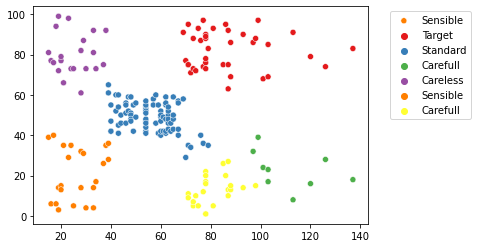

In [204]:
sns.scatterplot(X[:,0],X[:,1],hue=y_hc_a,palette='Set1')
plt.legend(bbox_to_anchor=[1.05,1],labels=['Sensible','Target','Standard','Carefull','Careless','Sensible','Carefull'])